# **EJERCICIOS PRÁCTICOS**


LIBRERÍAS

In [ ]:
# Estas son nuestras "herramientas digitales"
import numpy as np           # Para trabajar con números y matrices
import matplotlib.pyplot as plt  # Para mostrar imágenes y gráficos
import cv2                   # Para cargar imágenes
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Colab
import ipywidgets as widgets
from IPython.display import display, clear_output

print("Herramientas listas para usar")
print("Ahora podemos cargar y trabajar con imágenes")

Herramientas listas para usar
Ahora podemos cargar y trabajar con imágenes


# ***Ejercicio 1: Detector personalizado (Básico)***



---


IMAGEN


---



Imagen cargada exitosamente
Tamaño de la imagen: (797, 1000, 3)
   - Alto: 797 píxeles
   - Ancho: 1000 píxeles
   - Canales de color: 3 (Rojo, Verde, Azul)


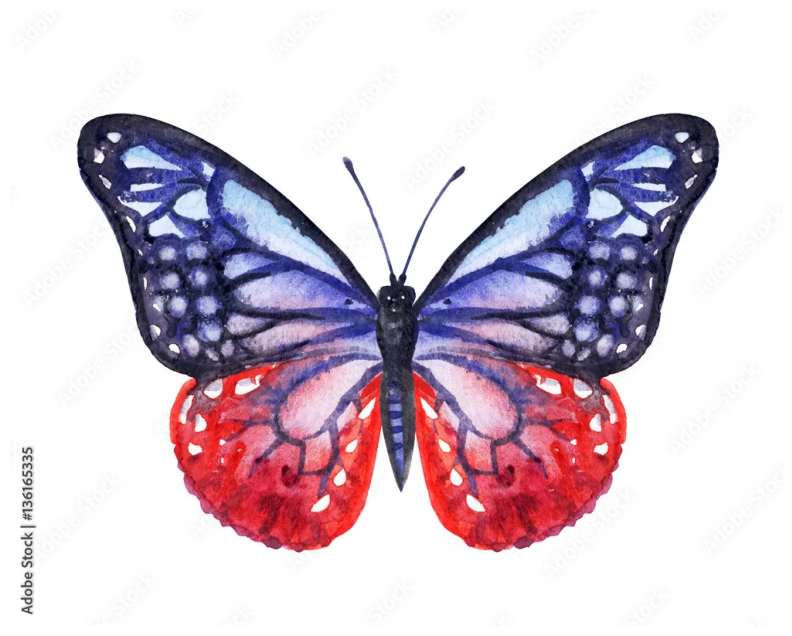

In [ ]:
# Descargamos una imagen con frutas variadas
!wget -q https://as2.ftcdn.net/jpg/01/36/16/53/1000_F_136165335_pjeEyzY6TkljWRXbaMg4q3VUPvL65y9k.webp -O mariposa.jpg

# Cargamos la imagen
imagen_original = cv2.imread('mariposa.jpg')

# Verificamos si la imagen se cargó correctamente
if imagen_original is None:
    print("ERROR: No se pudo cargar la imagen. Asegúrate de que 'mariposa.jpg' existe y no está corrupta.")
else:
    # IMPORTANTE: OpenCV carga en formato BGR, pero nosotros queremos RGB
    # Cambiamos el orden de los colores: [Azul, Verde, Rojo] → [Rojo, Verde, Azul]
    imagen_rgb = imagen_original[:, :, [2, 1, 0]]

    print(f"Imagen cargada exitosamente")
    print(f"Tamaño de la imagen: {imagen_rgb.shape}")
    print(f"   - Alto: {imagen_rgb.shape[0]} píxeles")
    print(f"   - Ancho: {imagen_rgb.shape[1]} píxeles")
    print(f"   - Canales de color: {imagen_rgb.shape[2]} (Rojo, Verde, Azul)")

    # Mostramos la imagen
    plt.figure(figsize=(12, 8))
    plt.imshow(imagen_rgb)
    plt.axis('off')  # Quitamos los números de los ejes para ver mejor
    plt.show()



---


MÉTODO 1: PARA Elegir un píxel representativo del azul

---



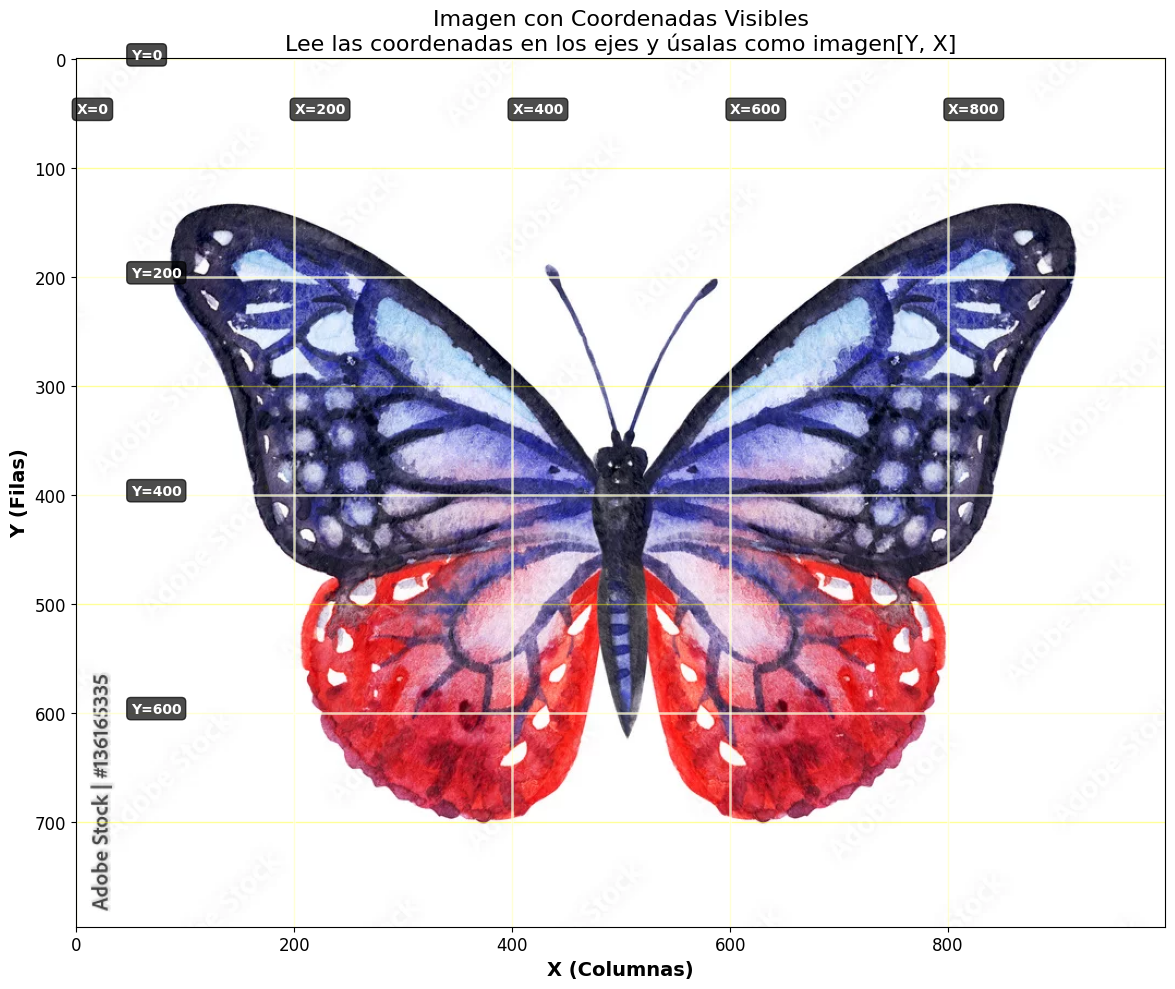

In [ ]:
def mostrar_con_coordenadas(imagen, paso_grilla=200):
    """
    Muestra imagen con coordenadas claramente visibles
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(imagen)

    # Configuramos los ejes para mostrar coordenadas
    ax.set_xlabel('X (Columnas)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y (Filas)', fontsize=14, fontweight='bold')
    ax.set_title('Imagen con Coordenadas Visibles\nLee las coordenadas en los ejes y úsalas como imagen[Y, X]', fontsize=16)

    # Añadimos grilla para facilitar lectura
    ax.grid(True, alpha=0.4, color='yellow', linewidth=1)

    # Configuramos los ticks para que sean más legibles
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Añadimos líneas de referencia cada cierto intervalo
    for x in range(0, imagen.shape[1], paso_grilla):
        ax.axvline(x=x, color='white', alpha=0.6, linewidth=2)
        ax.text(x, 50, f'X={x}', color='white', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7))

    for y in range(0, imagen.shape[0], paso_grilla):
        ax.axhline(y=y, color='white', alpha=0.6, linewidth=2)
        ax.text(50, y, f'Y={y}', color='white', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7))

    plt.tight_layout()
    plt.show()

mostrar_con_coordenadas(imagen_rgb)

In [ ]:
# Coordenada ejemplo para amarillo
y_azul, x_azul = 300, 200
pixel_azul = imagen_rgb[y_azul, x_azul]

print(f"Píxel azul en ({y_azul}, {x_azul}): R={pixel_azul[0]}, G={pixel_azul[1]}, B={pixel_azul[2]}")

Píxel azul en (300, 200): R=57, G=61, B=121




---


DEFINIR UMBRALES


---



In [ ]:
# Definir umbrales usando lógica de buffer (“colchón” de tolerancia para atrapar todos los píxeles que están “más o menos” en el mismo color)
umbral_rojo_max = pixel_azul[0] + 30   # Rojo bajo
umbral_verde_max = pixel_azul[1] + 30  # Verde bajo
umbral_azul_min = max(0, pixel_azul[2] - 30)  # Azul alto

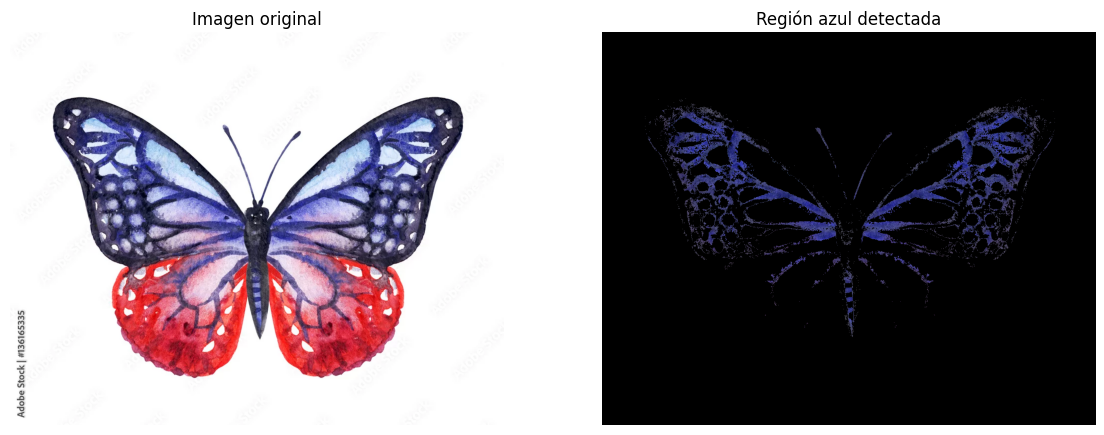

In [ ]:
# Separar canales
canal_rojo = imagen_rgb[:, :, 0]
canal_verde = imagen_rgb[:, :, 1]
canal_azul = imagen_rgb[:, :, 2]
#Se separan los canales de color (R, G, B) porque la imagen está guardada como un cubo de datos

# Crear máscara para azul
mascara_azul = (canal_rojo <= umbral_rojo_max) & \
               (canal_verde <= umbral_verde_max) & \
               (canal_azul >= umbral_azul_min)

# Creamos una máscara binaria (matriz de True/False, o 1/0):
# True = píxel cumple las reglas de color (ej: azul).
# False = píxel no cumple.


# Aplicar máscara
imagen_resultado_azul = imagen_rgb.copy()
imagen_resultado_azul[~mascara_azul] = 0


# Comparativo lado a lado
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_resultado_azul)
plt.title("Región azul detectada")
plt.axis('off')

plt.show()



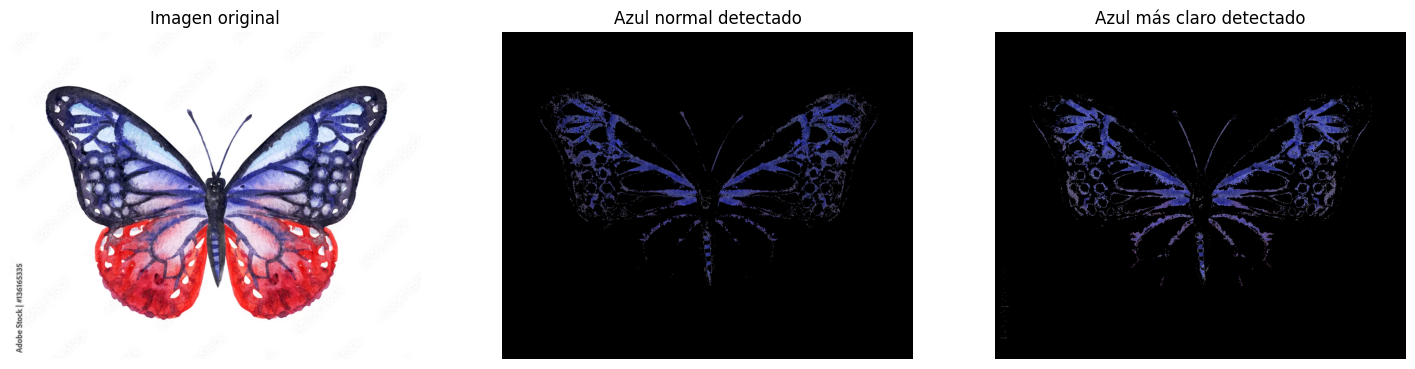

In [ ]:
# --- Umbrales Azul "Claro" ---
umbral_rojo_max_claro = pixel_azul[0] + 60   # permitimos más rojo
umbral_verde_max_claro = pixel_azul[1] + 60  # permitimos más verde
umbral_azul_min_claro = max(0, pixel_azul[2] - 10)  # azul sigue alto pero con menos restricción

mascara_azul_claro = (canal_rojo <= umbral_rojo_max_claro) & \
                     (canal_verde <= umbral_verde_max_claro) & \
                     (canal_azul >= umbral_azul_min_claro)

imagen_azul_claro = imagen_rgb.copy()
imagen_azul_claro[~mascara_azul_claro] = 0

# --- Comparativo ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_resultado_azul)
plt.title("Azul normal detectado")
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(imagen_azul_claro)
plt.title("Azul más claro detectado")
plt.axis('off')

plt.show()


# ***Ejercicio 2: Análisis comparativo (Intermedio)***


In [ ]:
def mostrar_histograma_canal(canal, titulo, color):
    """
    Muestra el histograma de un canal de color específico.
    """
    plt.figure(figsize=(8, 4))
    plt.hist(canal.ravel(), bins=256, range=[0, 256], color=color, alpha=0.7)
    plt.title(titulo)
    plt.xlabel("Intensidad de píxel")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()



=== HISTOGRAMAS POR CANAL ===
Estos histogramas nos ayudan a elegir umbrales para segmentación



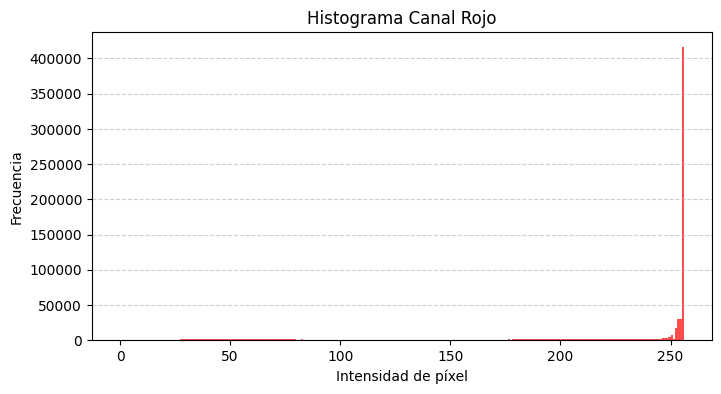

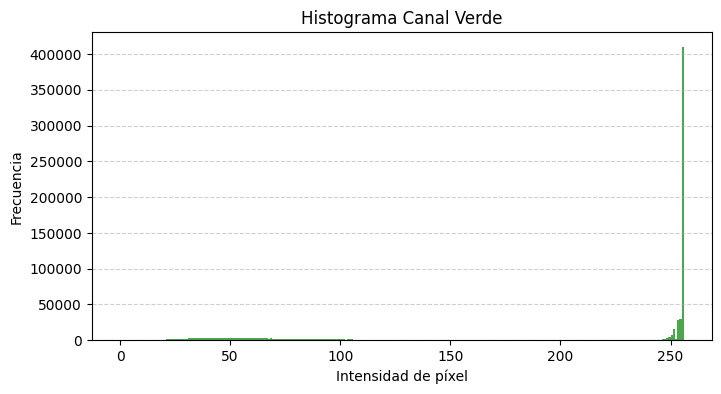

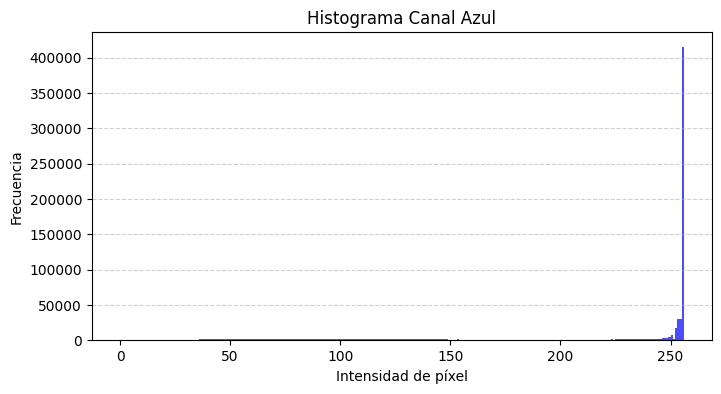

INTERPRETACIÓN:
- Picos altos indican intensidades muy comunes en la imagen


In [ ]:
# Mostramos histogramas de cada canal
print("=== HISTOGRAMAS POR CANAL ===")
print("Estos histogramas nos ayudan a elegir umbrales para segmentación\n")

mostrar_histograma_canal(canal_rojo, "Histograma Canal Rojo", 'red')
mostrar_histograma_canal(canal_verde, "Histograma Canal Verde", 'green')
mostrar_histograma_canal(canal_azul, "Histograma Canal Azul", 'blue')

print("INTERPRETACIÓN:")
print("- Picos altos indican intensidades muy comunes en la imagen")

Eje X → intensidad (0 = negro, 255 = blanco)

Eje Y → cantidad de píxeles con esa intensidad

🟦 Canal Azul
• 	Hay muchísimos píxeles con azul muy fuerte (valor 255), lo que seguramente corresponde al fondo claro o cielo.
• 	El azul del ala de la mariposa que encontraste (valor 121) aparece en la imagen, pero en menor cantidad. Es un azul más suave, no tan brillante como el del fondo.


🔴🟢 Canales Rojo y Verde
• 	También hay muchos píxeles con rojo y verde muy altos (valor 255), lo que indica que hay zonas muy brillantes o saturadas en esos colores.
• 	Pero tu píxel azul tiene rojo y verde bajitos (R=57, G=61), lo que lo hace distinto y fácil de separar del resto.



---


 **SEGMENTACIÓN/Separar lo que te interesa del resto de una imagen**


---



In [ ]:

# Separamos los canales
canal_rojo = imagen_rgb[:, :, 0]
canal_verde = imagen_rgb[:, :, 1]
canal_azul = imagen_rgb[:, :, 2]

#dividir el problema en tres pistas de audio para poder ajustar cada una sin arruinar las otras.

# Definimos umbrales basados en el histograma
print("=== DEFINICIÓN DE UMBRALES ===")
print("Para detectar azul medio (como el ala de mariposa):")

umbral_azul_min = 100   # Azul medio, evitando el fondo brillante. rango medio-alto.
umbral_azul_max = 140
umbral_rojo_max = 80    # Poco rojo          máximo bajo.
umbral_verde_max = 80   # Poco verde

print(f"- Canal AZUL entre {umbral_azul_min} y {umbral_azul_max}")
print(f"- Canal ROJO <= {umbral_rojo_max}")
print(f"- Canal VERDE <= {umbral_verde_max}")

# Creamos máscaras individuales
mascara_azul = (canal_azul >= umbral_azul_min) & (canal_azul <= umbral_azul_max)
mascara_rojo = canal_rojo <= umbral_rojo_max
mascara_verde = canal_verde <= umbral_verde_max

# Combinamos las máscaras
mascara_final = mascara_azul & mascara_rojo & mascara_verde

print("\n=== ESTADÍSTICAS DE MÁSCARAS INDIVIDUALES ===")
print(f"Píxeles con azul medio: {np.sum(mascara_azul)} de {mascara_azul.size}")
print(f"Píxeles con poco rojo: {np.sum(mascara_rojo)} de {mascara_rojo.size}")
print(f"Píxeles con poco verde: {np.sum(mascara_verde)} de {mascara_verde.size}")
print(f"Píxeles que cumplen todos los criterios: {np.sum(mascara_final)} de {mascara_final.size}")


=== DEFINICIÓN DE UMBRALES ===
Para detectar azul medio (como el ala de mariposa):
- Canal AZUL entre 100 y 140
- Canal ROJO <= 80
- Canal VERDE <= 80

=== ESTADÍSTICAS DE MÁSCARAS INDIVIDUALES ===
Píxeles con azul medio: 52721 de 797000
Píxeles con poco rojo: 102845 de 797000
Píxeles con poco verde: 166447 de 797000
Píxeles que cumplen todos los criterios: 23498 de 797000


Azul estricto: 16106 píxeles detectados
Azul medio: 47384 píxeles detectados
Azul relajado: 109933 píxeles detectados


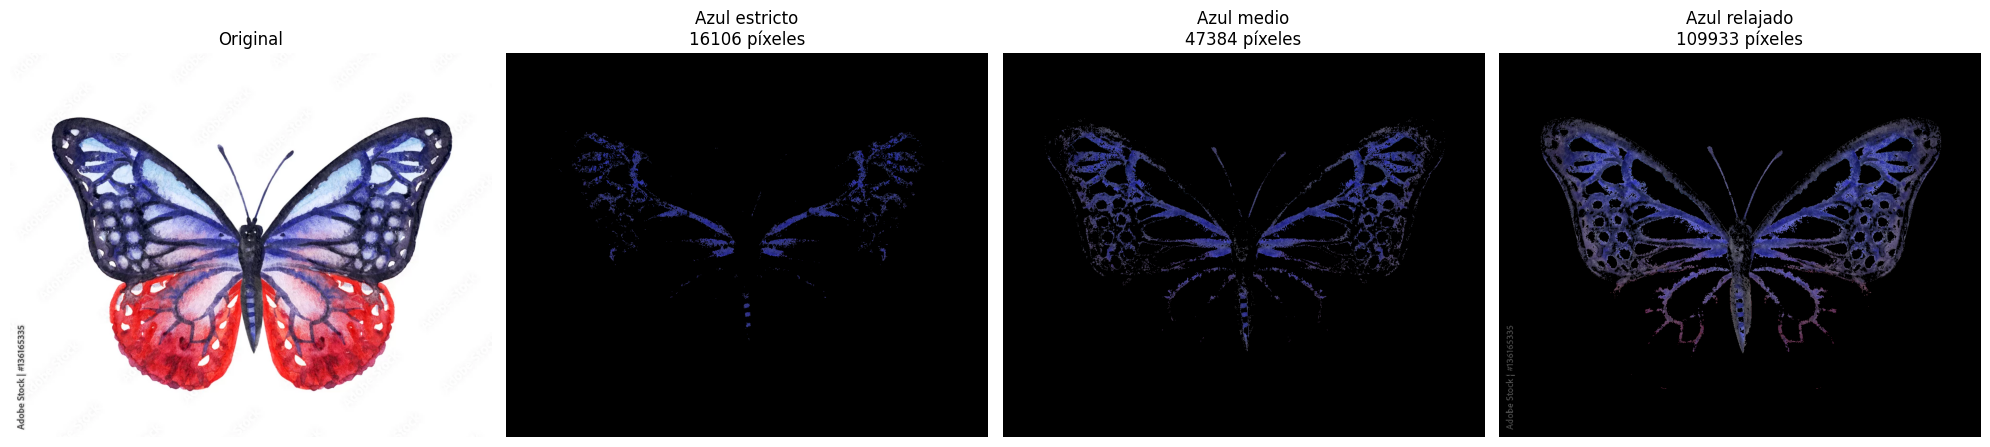

In [ ]:
# Definimos diferentes sets de umbrales/ regla de filtro
umbrales = {
    "Azul estricto": {"R_max": pixel_azul[0]+10, "G_max": pixel_azul[1]+10, "B_min": pixel_azul[2]-10}, #Estricto → solo azul puro
    "Azul medio": {"R_max": pixel_azul[0]+30, "G_max": pixel_azul[1]+30, "B_min": pixel_azul[2]-30}, #azul con un poquito de mezcla
    "Azul relajado": {"R_max": pixel_azul[0]+60, "G_max": pixel_azul[1]+60, "B_min": pixel_azul[2]-60}, #cualquier cosa que se parezca a azul
}

# Aplicar cada conjunto de umbrales y contar píxeles
fig, axes = plt.subplots(1, len(umbrales)+1, figsize=(20,6))

axes[0].imshow(imagen_rgb)
axes[0].set_title("Original")
axes[0].axis('off')

for i, (nombre, u) in enumerate(umbrales.items(), start=1):
    mascara = (canal_rojo <= u["R_max"]) & (canal_verde <= u["G_max"]) & (canal_azul >= u["B_min"])
    pixeles_detectados = mascara.sum()
    print(f"{nombre}: {pixeles_detectados} píxeles detectados")

    imagen_resultado = imagen_rgb.copy()
    imagen_resultado[~mascara] = 0

    axes[i].imshow(imagen_resultado)
    axes[i].set_title(f"{nombre}\n{pixeles_detectados} píxeles")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

- Azul estricto:

Detecta pocos píxeles, porque solo toma azul casi puro.

Muy preciso, pero puede perder partes del objeto que no sean azul intenso.

- **Azul medio**:

Detecta más píxeles, incluyendo los que tienen un poco de mezcla con otros colores.

Buen balance entre cantidad y precisión, ideal para objetos que no son uniformes.

- Azul relajado:

Detecta muchos píxeles, incluyendo zonas que podrían no ser azul real.

Aumenta la cobertura, pero pierde precisión, porque incluye colores cercanos al azul pero que no son exactamente el color del objeto.

# ***Ejercicio 3: Proyecto libre (Avanzado)***

In [ ]:
def crear_explorador_widgets(imagen):
    """
    Crea un explorador interactivo usando widgets de ipywidgets
    """
    # Creamos los widgets
    x_slider = widgets.IntSlider(
        value=imagen.shape[1]//2,
        min=0,
        max=imagen.shape[1]-1,
        step=1,
        description='X (col):',
        style={'description_width': 'initial'}
    )

    y_slider = widgets.IntSlider(
        value=imagen.shape[0]//2,
        min=0,
        max=imagen.shape[0]-1,
        step=1,
        description='Y (fila):',
        style={'description_width': 'initial'}
    )

    radio_slider = widgets.IntSlider(
        value=50,
        min=20,
        max=200,
        step=10,
        description='Radio zoom:',
        style={'description_width': 'initial'}
    )

    output = widgets.Output()

    def actualizar_exploracion(x, y, radio):
        with output:
            clear_output(wait=True)

            # Obtenemos el valor del píxel
            pixel = imagen[y, x]

            # Creamos la visualización
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))

            # Imagen completa con punto marcado
            axes[0].imshow(imagen)
            axes[0].plot(x, y, 'r+', markersize=20, markeredgewidth=4)
            axes[0].set_title(f'Imagen completa\nPíxel seleccionado: ({x}, {y})')
            axes[0].grid(True, alpha=0.3)
            axes[0].set_xlabel('X (columnas)')
            axes[0].set_ylabel('Y (filas)')

            # Zoom de la región
            y_min = max(0, y - radio)
            y_max = min(imagen.shape[0], y + radio)
            x_min = max(0, x - radio)
            x_max = min(imagen.shape[1], x + radio)

            region = imagen[y_min:y_max, x_min:x_max]
            axes[1].imshow(region)

            # Marcamos el punto central en la región
            centro_x = x - x_min
            centro_y = y - y_min
            axes[1].plot(centro_x, centro_y, 'r+', markersize=15, markeredgewidth=3)

            axes[1].set_title(f'Zoom de región {region.shape[0]}x{region.shape[1]}')
            axes[1].grid(True, alpha=0.5)

            plt.tight_layout()
            plt.show()

            # Información del píxel
            print(f"INFORMACIÓN DEL PÍXEL:")
            print(f"Coordenadas: ({x}, {y}) -> usar como imagen[{y}, {x}]")
            print(f"Color RGB: R={pixel[0]}, G={pixel[1]}, B={pixel[2]}")
            print(f"Código para acceder: pixel = imagen_rgb[{y}, {x}]")

    # Conectamos los widgets
    interactive = widgets.interactive(actualizar_exploracion, x=x_slider, y=y_slider, radio=radio_slider)

    return widgets.VBox([interactive, output])

print("EXPLORADOR INTERACTIVO:")
print("Mueve los sliders para explorar diferentes píxeles de la imagen")
explorador = crear_explorador_widgets(imagen_rgb)
display(explorador)

EXPLORADOR INTERACTIVO:
Mueve los sliders para explorar diferentes píxeles de la imagen
